In [1]:
import argparse
import numpy as np
from scipy.sparse import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_weight(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    return W

In [3]:
def create_Lap(W):
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L

In [4]:
def find_eigvectors(eigvalue, eigvec, p, q):
    sort_eigval = np.sort(eigvalue)
    vec1 = eigvec[np.where(eigvalue == sort_eigval[p-1])][0]
    vec2 = eigvec[np.where(eigvalue == sort_eigval[q-1])][0]
    return (vec1, vec2)

In [5]:
def plot_eigenval(eigvalue, n):
    num_eigval = np.linspace(1, n, n)
    val_eigval = np.sort(eigvalue)
    plt.plot(num_eigval, val_eigval)

In [6]:
def plot_eigenvec(eigvalue, eigvec, p, q):
    second_vec, third_vec = find_eigvectors(eigvalue, eigvec, p, q)
    plt.plot(second_vec, third_vec)

In [7]:
# 100 nodes Chain graph

In [8]:
n = 100
edgelist = [[i,i+1] for i in range(n-1)] #chain graph
W = create_weight(edgelist,n)
L_chain_100 = create_Lap(W)
(eigvalue, eigvec) = np.linalg.eig(L_chain_100)

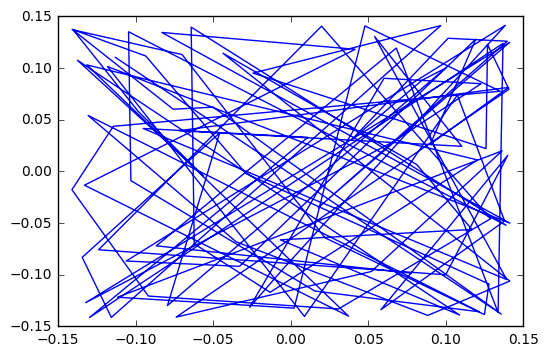

In [9]:
# graph of eigenvectors
plot_eigenvec(eigvalue, eigvec, 2, 3)

In [11]:
eig_vecs_sorted = eigvec[:, eigvalue.argsort()]

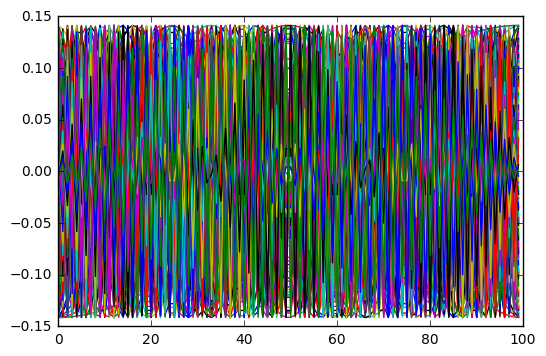

In [13]:
plt.plot(eig_vecs_sorted)
plt.show()

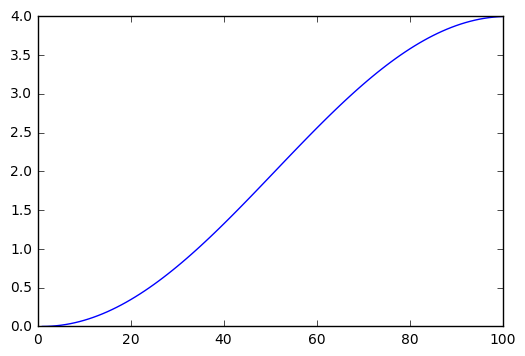

In [10]:
# graph of eigenvalues
plot_eigenval(eigvalue, 100)

In [64]:
# delete edgelist[50] graph
del edgelist[50]
L_del = create_Lap(create_weight(edgelist,n))
(eigvalue_del, eigvec_del) = np.linalg.eig(L_del)

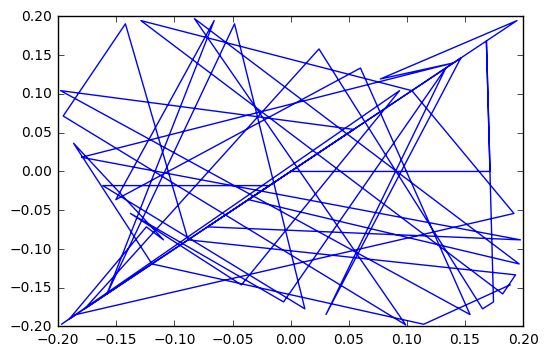

In [72]:
# graph of eigenvectors
plot_eigenvec(eigvalue_del, eigvec_del, 2, 3)

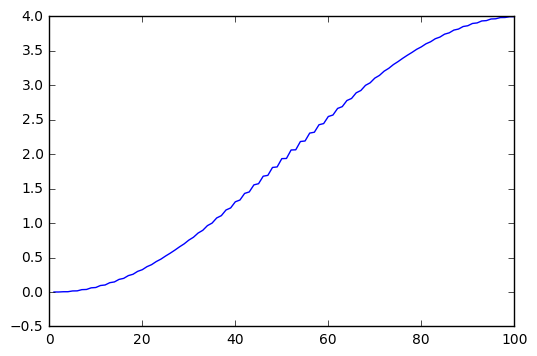

In [88]:
# graph of eigenvalues
plot_eigenval(eigvalue_del, 100)

In [67]:
# graph with 5 tails
p = 40
zero_list = [[i,i+1] for i in range(p-1)] #chain graph
first_tail = [[i,i+1] for i in range(40, 59)]
second_tail = [[i,i+1] for i in range(60, 79)]
third_tail = [[i,i+1] for i in range(80, 99)]
joinpoint = [[20, 40], [20, 60]]
edgelist = zero_list + first_tail + second_tail + third_tail + joinpoint
W = create_weight(edgelist,100)
L_5tail = create_Lap(W)
(eigvalue_5tail, eigvec_5tail) = np.linalg.eig(L_5tail)

/home/william/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


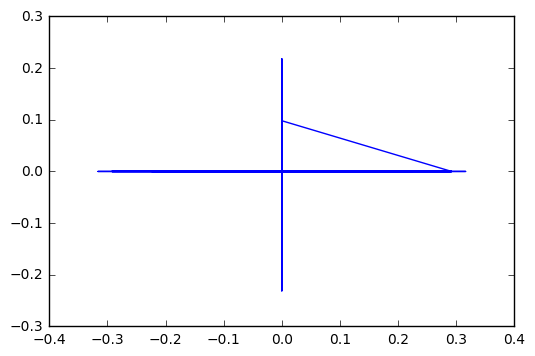

In [68]:
# graph of eigenvectors
plot_eigenvec(eigvalue_5tail, eigvec_5tail, 2, 3)

/home/william/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


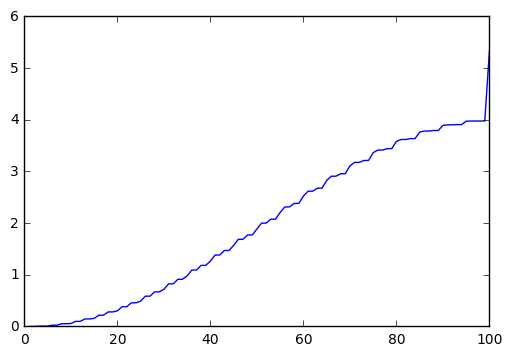

In [69]:
# graph of eigenvalues
plot_eigenval(eigvalue_5tail, n)

In [86]:
# graph star1
edgelist = [[0,2], [0,3], [2,3], [1,2], [1,5], [3,4], [4,6], [2,5], [3,6], [5,7], [6,7], [5,8], [7,8], [7,9], [6,9]]
W = create_weight(edgelist,10)
L_star = create_Lap(W)
(eigvalue_star, eigvec_star) = np.linalg.eig(L_star)

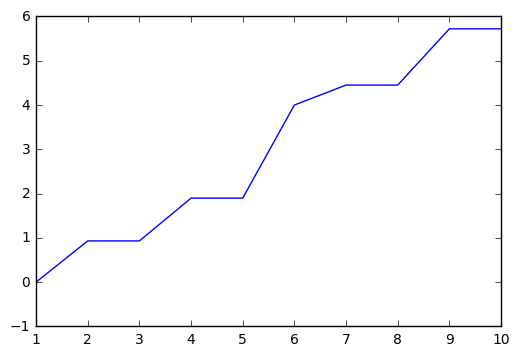

In [90]:
plot_eigenval(eigvalue_star, 10)

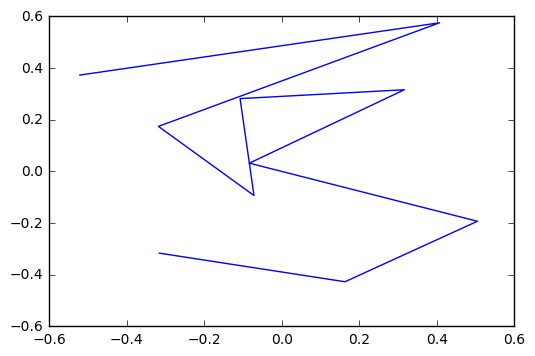

In [91]:
plot_eigenvec(eigvalue_star, eigvec_star, 2, 3)

In [92]:
# graph star2
edgelist = [[0,5], [0,6], [4,5], [4,7], [3,7], [3,8], [2,8], [2,9], [1,9], [1,6],[5,6], [6,9], [9,8], [8,7], [7,5]]
W = create_weight(edgelist,10)
L_star2 = create_Lap(W)
(eigvalue_star2, eigvec_star2) = np.linalg.eig(L_star2)

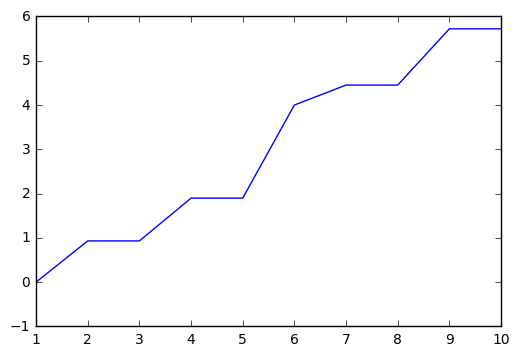

In [96]:
plot_eigenval(eigvalue_star2, 10)

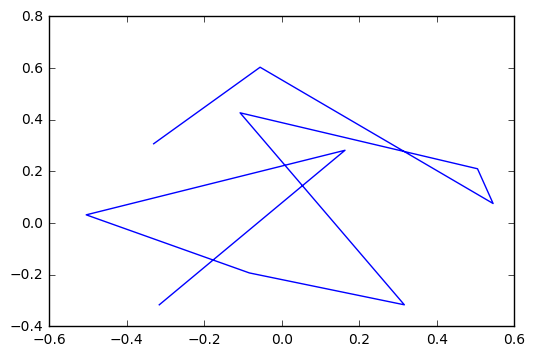

In [97]:
plot_eigenvec(eigvalue_star2, eigvec_star2, 2, 3)